In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
#import tensorflow_datasets as tfds

tfkl = tfk.layers

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
data_batch1 = unpickle('data_batch_1')
data1 = data_batch1[list(data_batch1.keys())[2]]
data_batch2 = unpickle('data_batch_2')
data2 = data_batch2[list(data_batch2.keys())[2]]
data_batch3 = unpickle('data_batch_3')
data3 = data_batch3[list(data_batch3.keys())[2]]
data_batch4 = unpickle('data_batch_4')
data4 = data_batch4[list(data_batch4.keys())[2]]
data_batch5 = unpickle('data_batch_5')
data5 = data_batch5[list(data_batch5.keys())[2]]

test_batch = unpickle('test_batch')
test = test_batch[list(test_batch.keys())[2]]
data = np.array([*data1, *data2, *data3, *data4, *data5])

In [5]:
img_shape = (32, 32, 3)

In [6]:

import numpy as np
x_train = data
x_test = test

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [7]:
import keras
from keras import layers

input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Using TensorFlow backend.


In [8]:
import tensorflow.keras as keras
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.6105 - val_loss: 0.5966
Epoch 2/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.5922 - val_loss: 0.5899
Epoch 3/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.5868 - val_loss: 0.5856
Epoch 4/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.5831 - val_loss: 0.5844
Epoch 5/50
50000/50000 [==============================] - 229s 5ms/step - loss: 0.5809 - val_loss: 0.5837
Epoch 6/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.5794 - val_loss: 0.5794
Epoch 7/50
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5782 - val_loss: 0.5783
Epoch 8/50
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5772 - val_loss: 0.5775
Epoch 9/50
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5764 - val_loss: 0.5768
Epo

In [9]:
import tensorflow.keras as keras
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 50000 samples, validate on 10000 samples


Epoch 1/25
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5682 - val_loss: 0.5693

Epoch 2/25
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5681 - val_loss: 0.5690
Epoch 3/25
50000/50000 [==============================] - 114s 2ms/step - loss: 0.5680 - val_loss: 0.5689
Epoch 4/25
50000/50000 [==============================] - 272s 5ms/step - loss: 0.5679 - val_loss: 0.5688
Epoch 5/25
50000/50000 [==============================] - 118s 2ms/step - loss: 0.5679 - val_loss: 0.5687
Epoch 6/25
50000/50000 [==============================] - 110s 2ms/step - loss: 0.5678 - val_loss: 0.5686
Epoch 7/25
50000/50000 [==============================] - 113s 2ms/step - loss: 0.5678 - val_loss: 0.5685
Epoch 8/25
50000/50000 [==============================] - 110s 2ms/step - loss: 0.5677 - val_loss: 0.5686
Epoch 9/25
50000/50000 [==============================] - 113s 2ms/step - loss: 0.5676 - val_loss: 

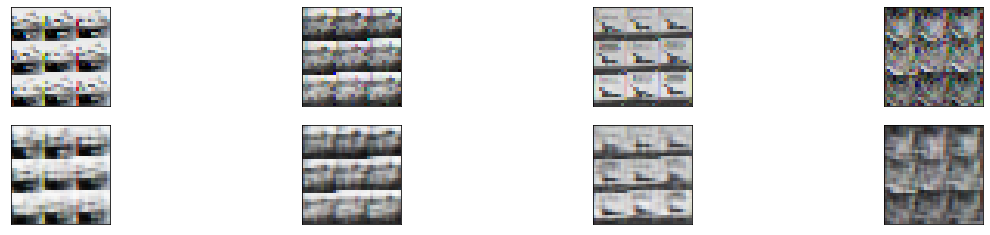

In [18]:
decoded_imgs = autoencoder.predict(x_test)
n = 4
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()